In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021

import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
import relaxation_times as rt
import matplotlib.pyplot as plt
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/relaxation_times.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if line is "":


In [16]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field=850
magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"
residues=24 # number of AA in a peptine, for take_all_in_folder="number"
input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"
folder_path="93_hMff_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_370ns_mahti_360ns_mahti_2940ns_no_solvent/"
output_name="hMff_SDS_micelle.out"
author_name="Ricky Nencini"

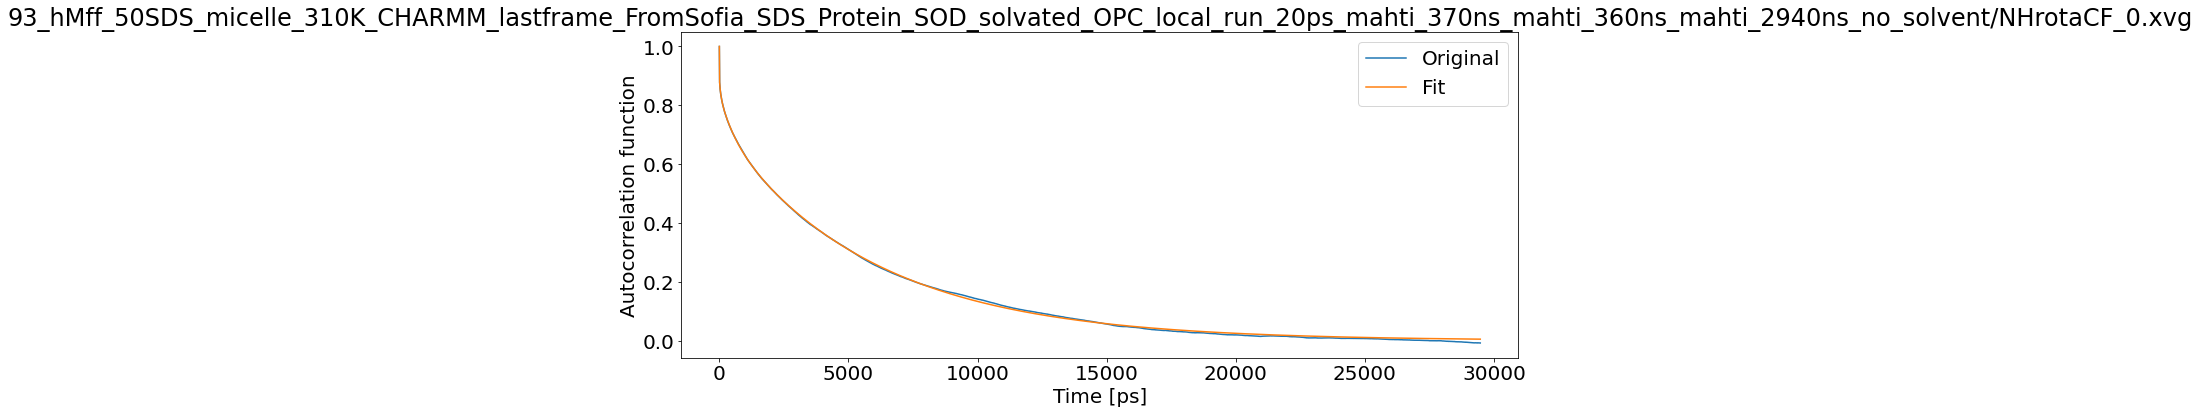

R1: 18.214965486993282 R2: 128.65191631573165 NOE: 0.9747507644394711


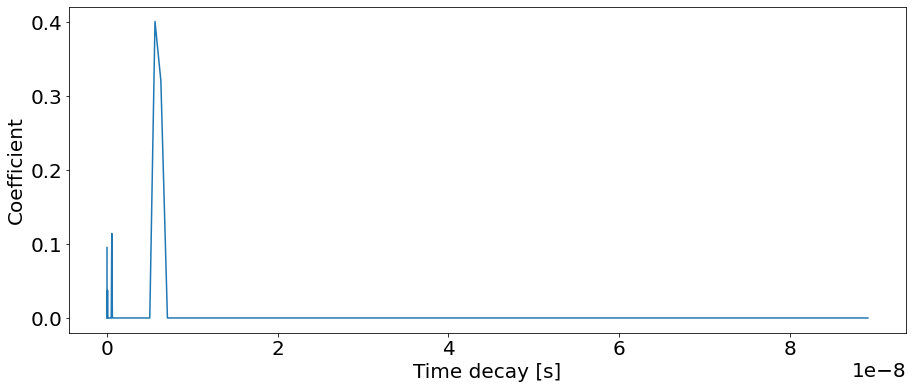

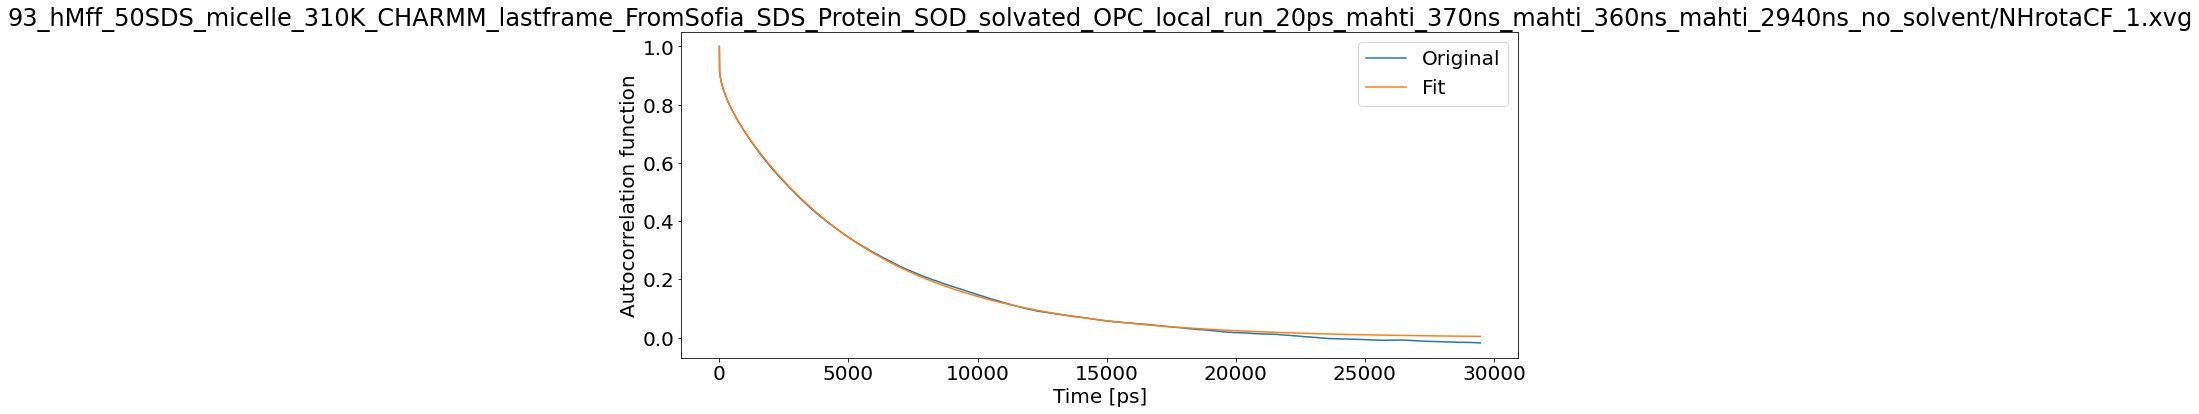

R1: 19.75599516129166 R2: 140.25329776876853 NOE: 0.9807127388185065


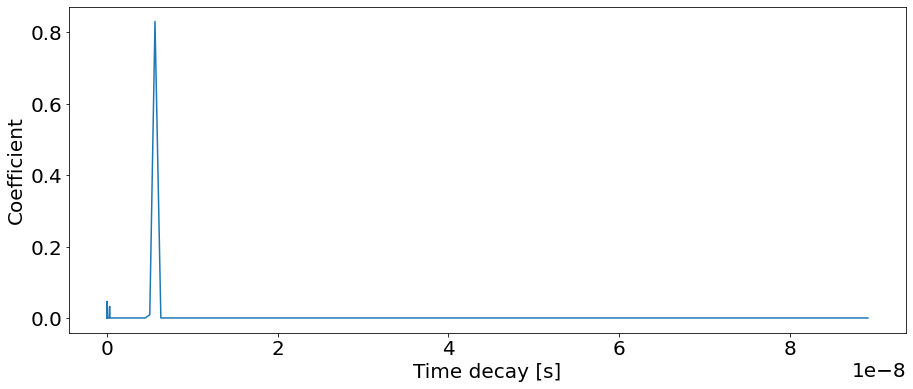

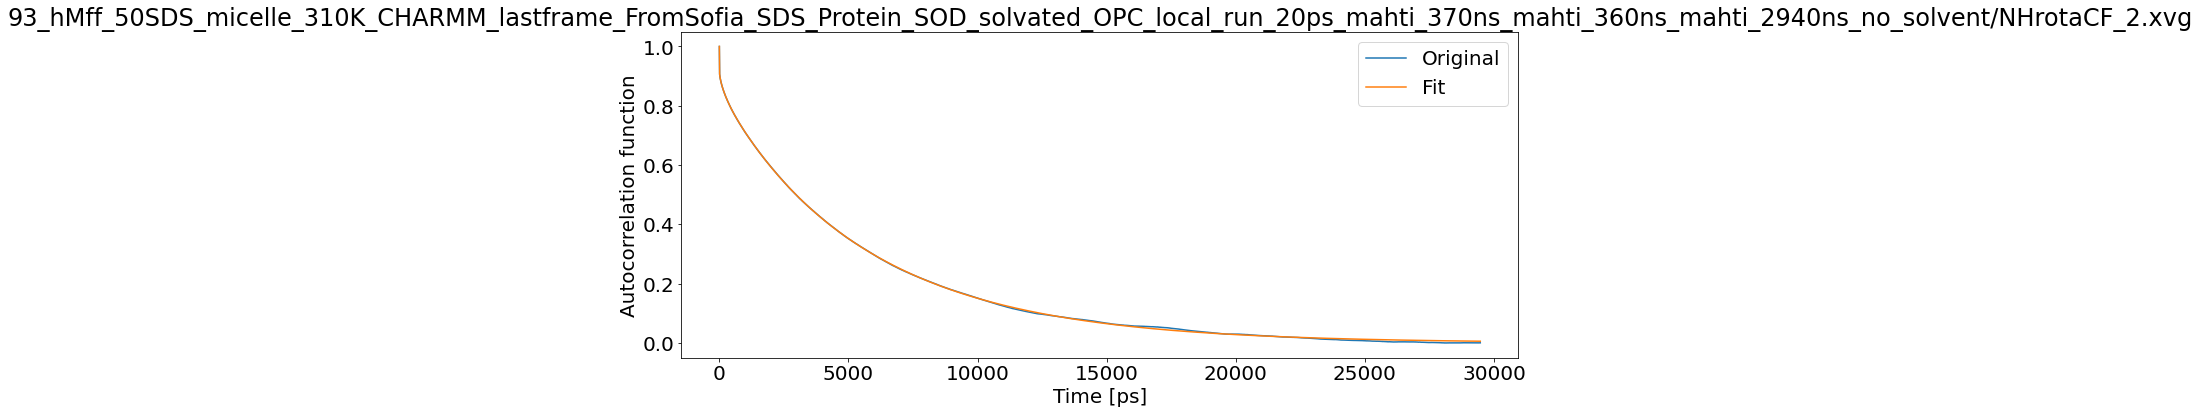

R1: 19.62974102042069 R2: 144.94832612189214 NOE: 0.9822809888384993


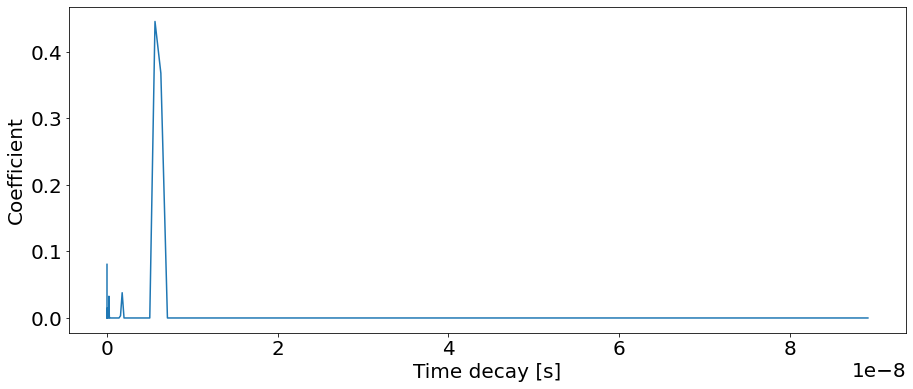

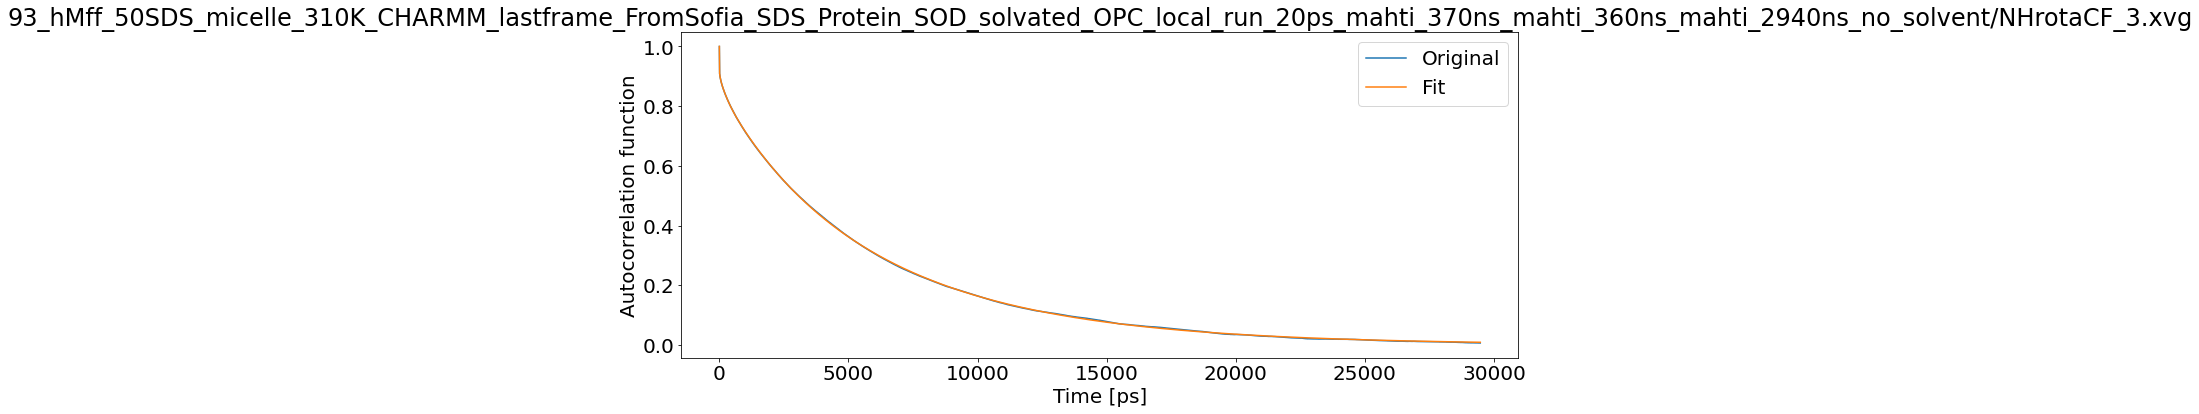

R1: 19.411595560860338 R2: 152.30897778240413 NOE: 0.982143163293562


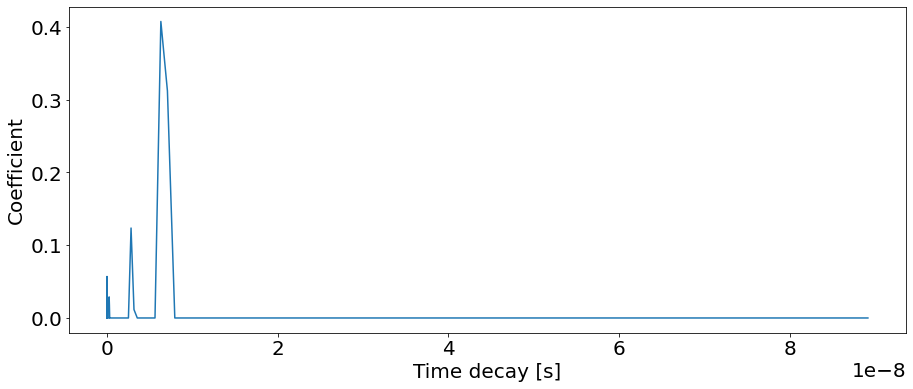

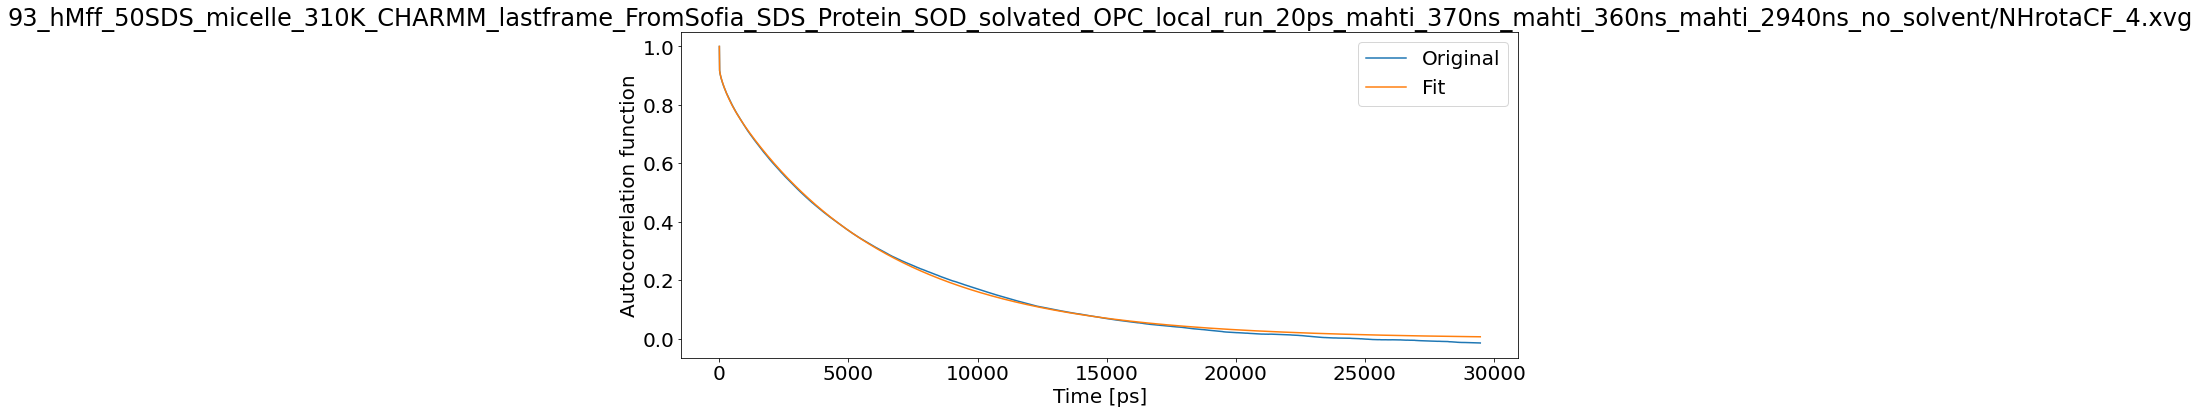

R1: 19.138727949882657 R2: 150.90035184579278 NOE: 0.9816263018615143


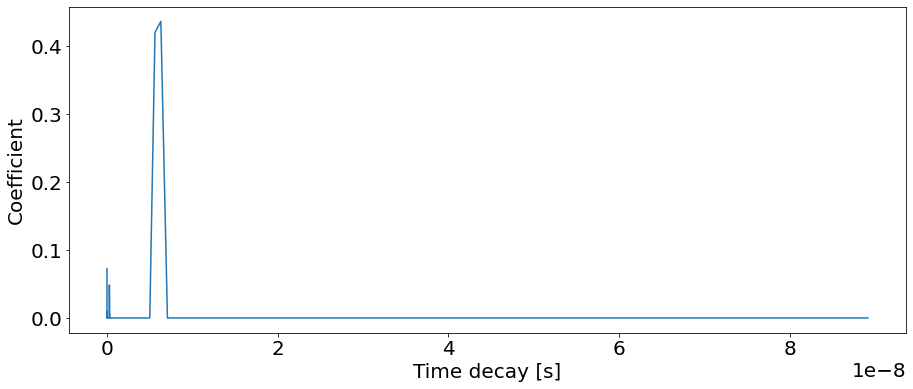

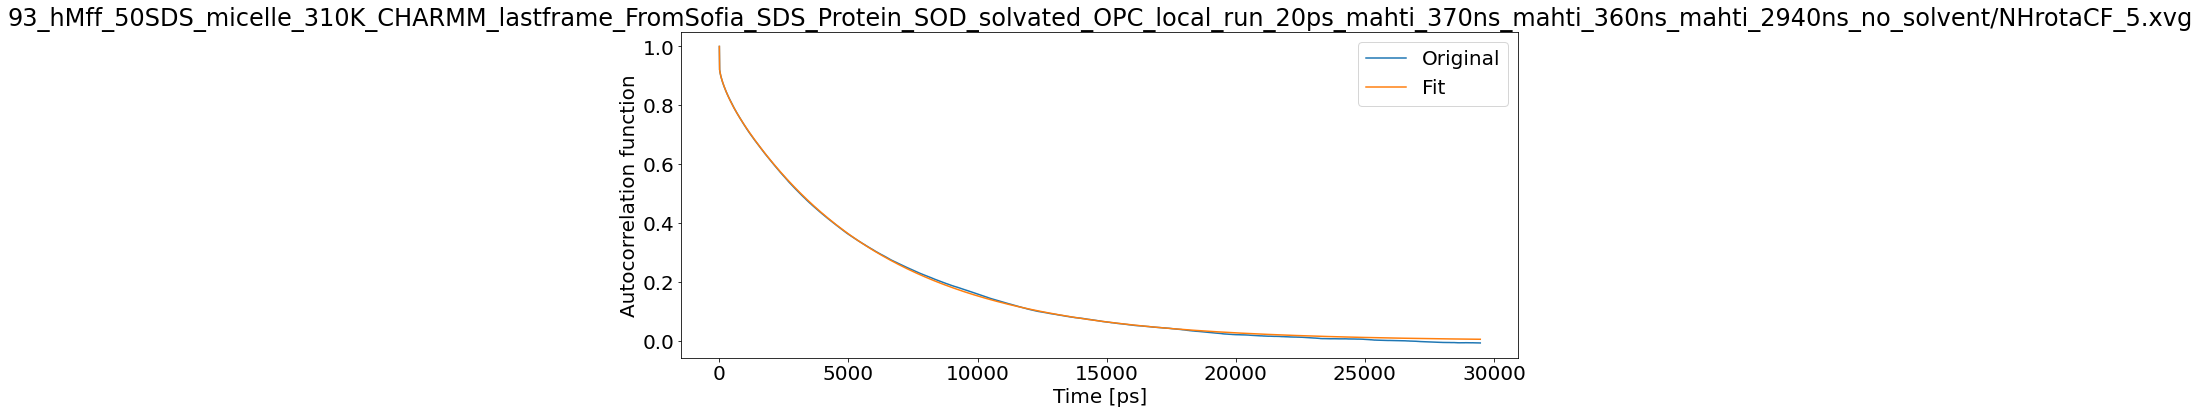

R1: 19.779496485196283 R2: 147.67289100138686 NOE: 0.9827029951418093


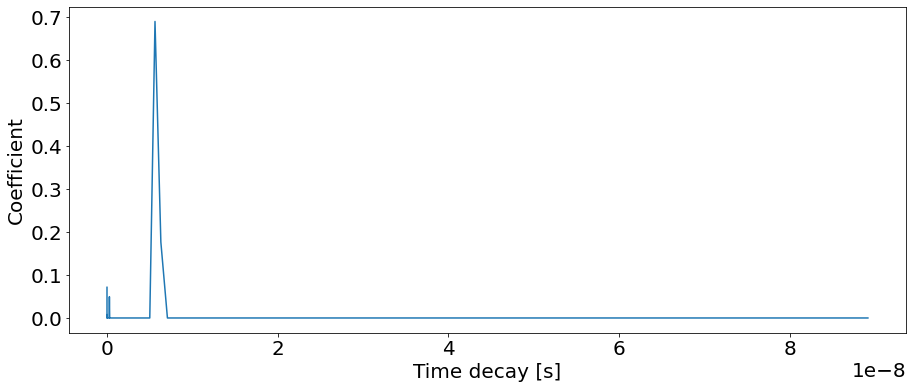

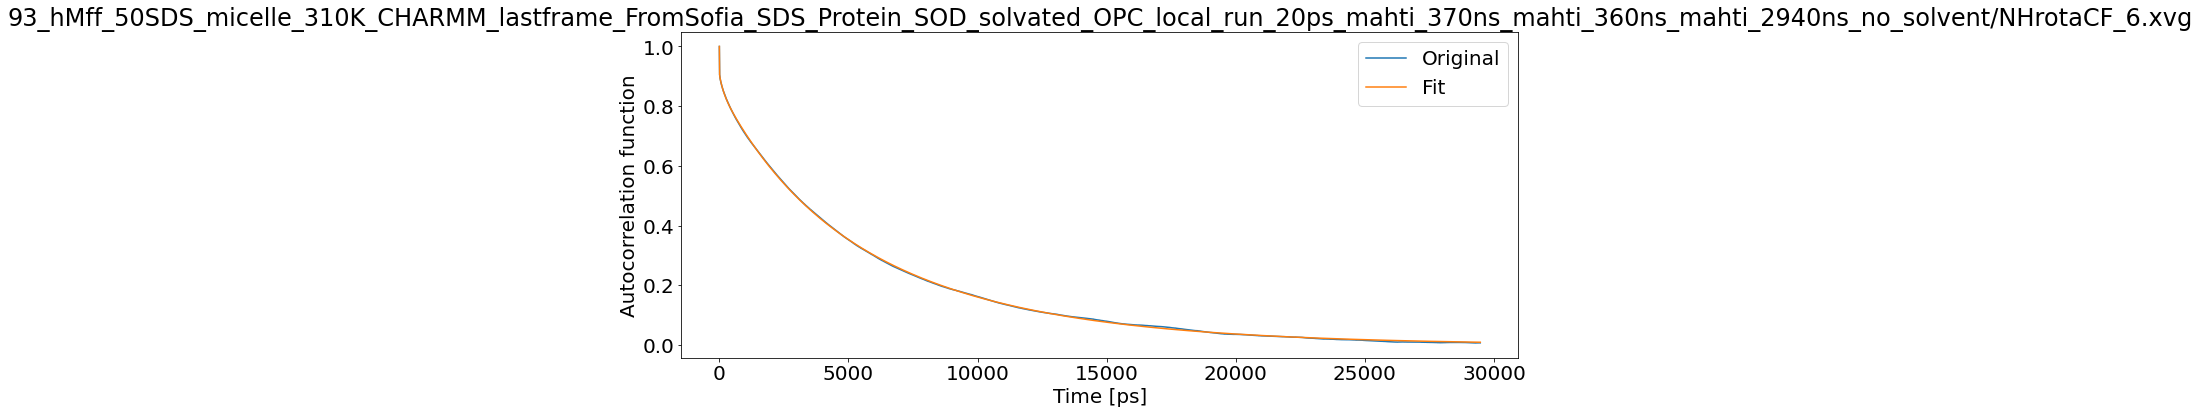

R1: 19.829035851114046 R2: 151.1986772879511 NOE: 0.9825111983026175


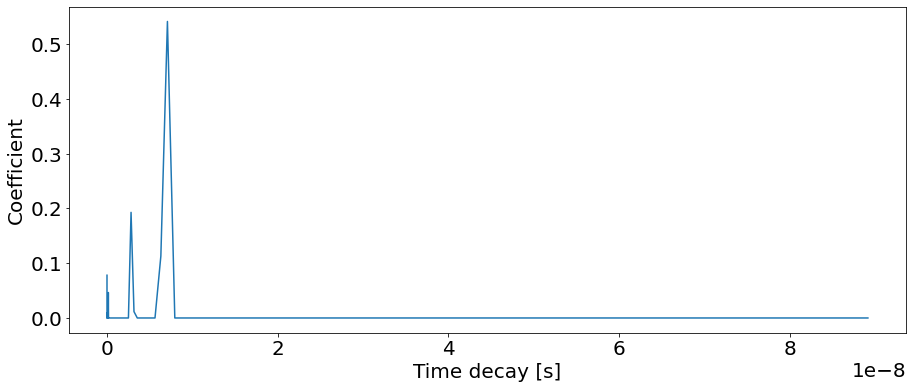

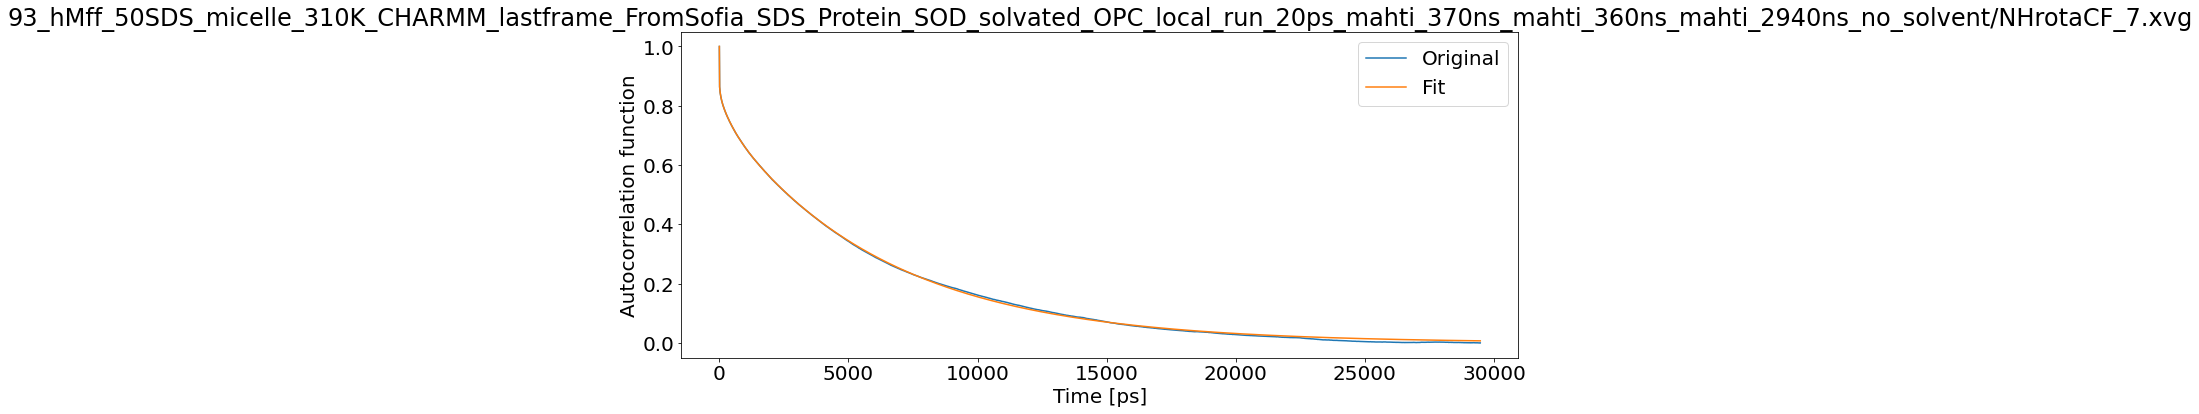

R1: 17.118772781417572 R2: 141.67937101479856 NOE: 0.9787658742683492


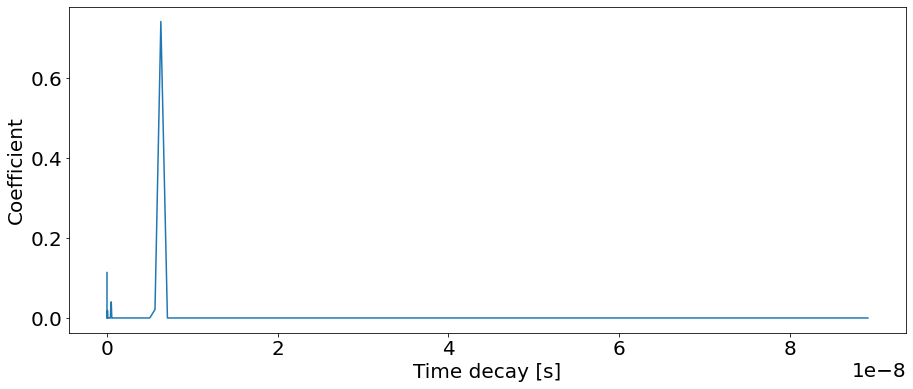

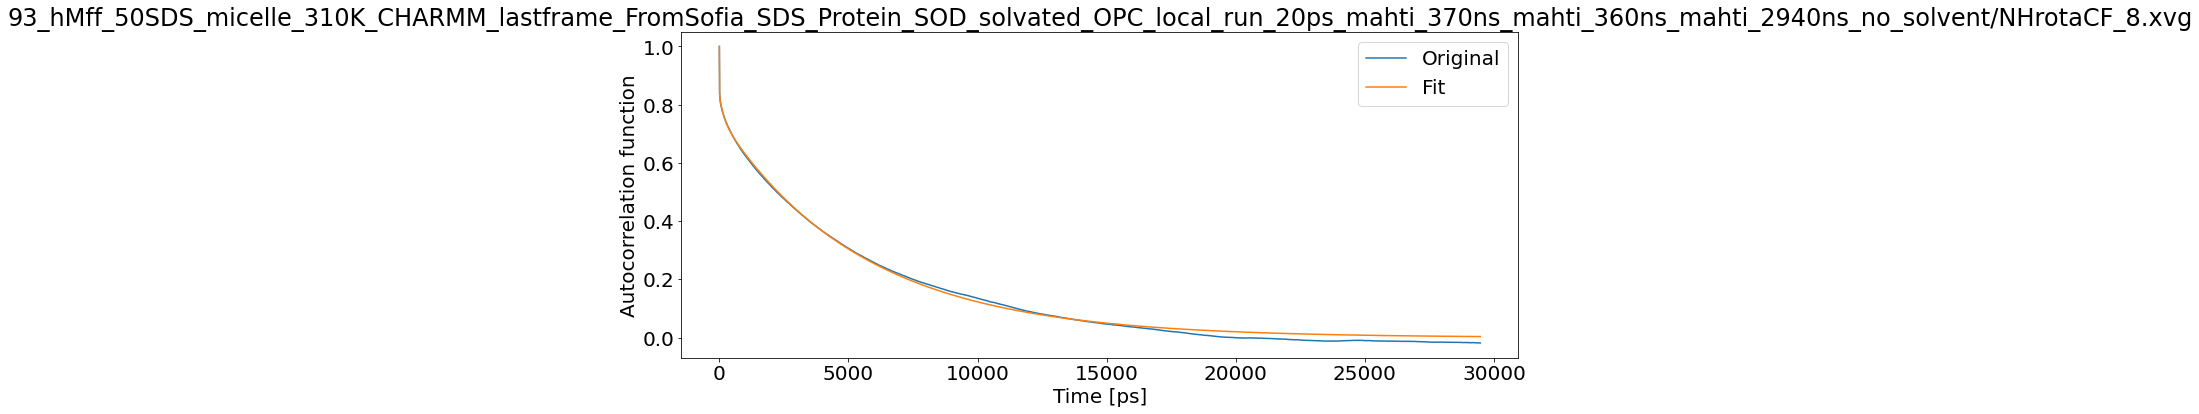

R1: 17.97560223791663 R2: 123.90752109817822 NOE: 0.9777911863448266


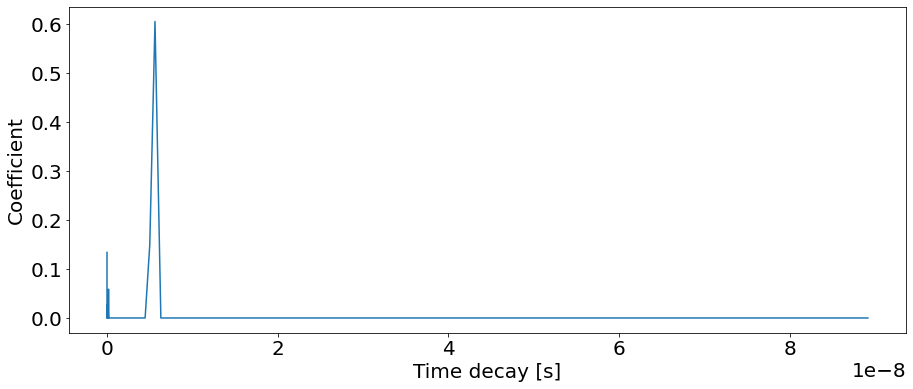

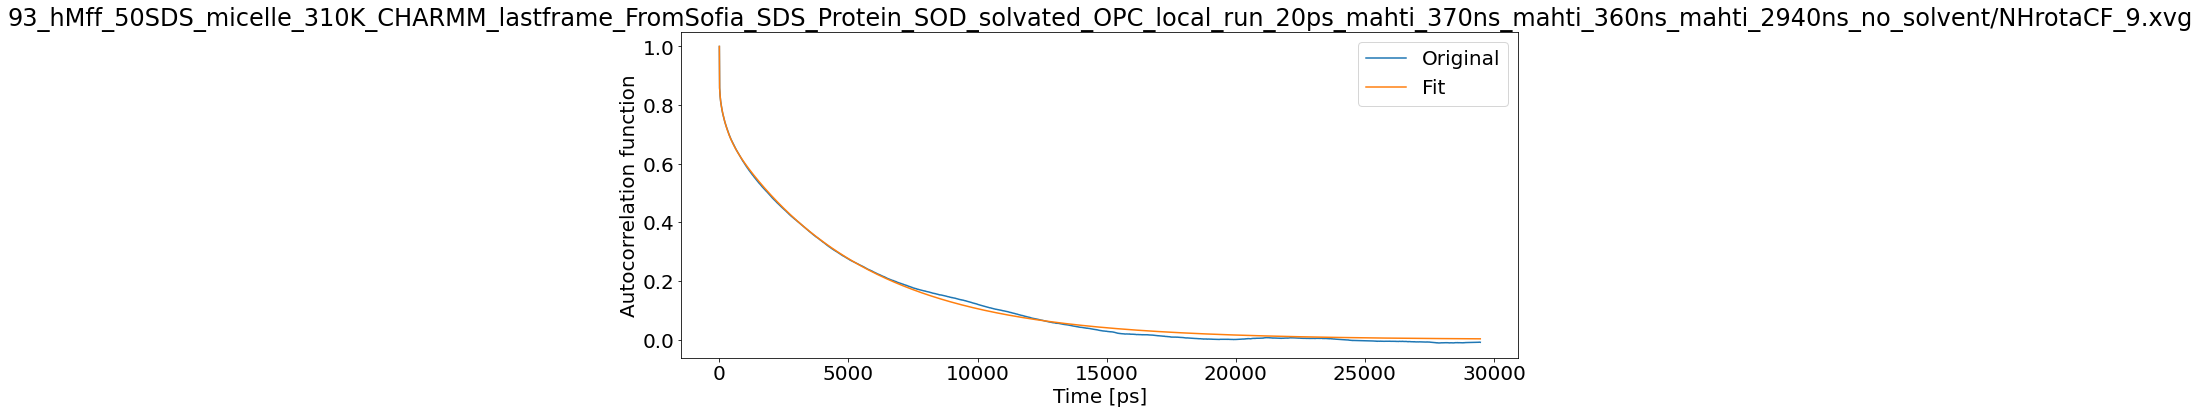

R1: 18.69059272702436 R2: 113.59514357494858 NOE: 0.9717144602794299


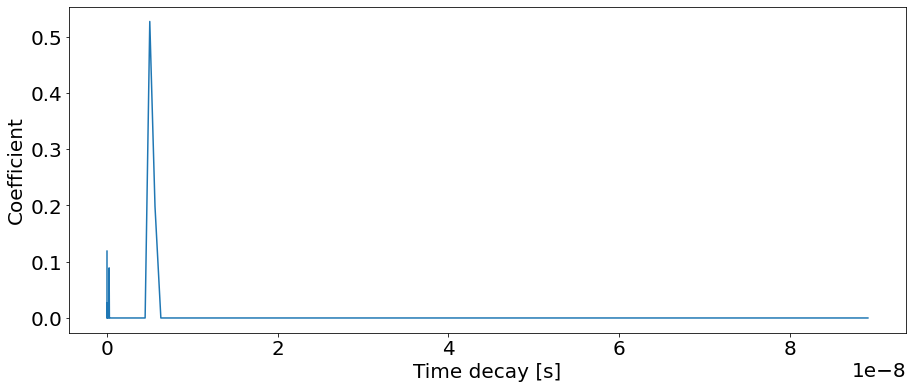

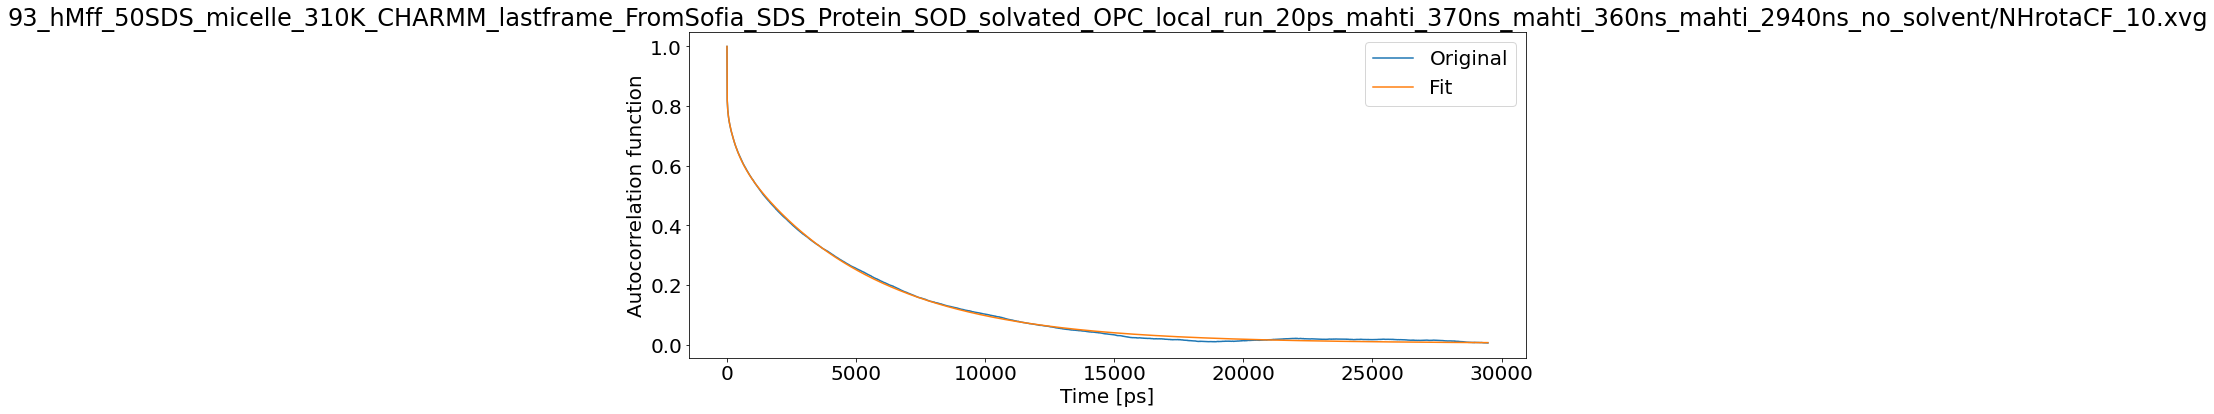

R1: 17.8399418598905 R2: 119.79774942511017 NOE: 0.9699571336725524


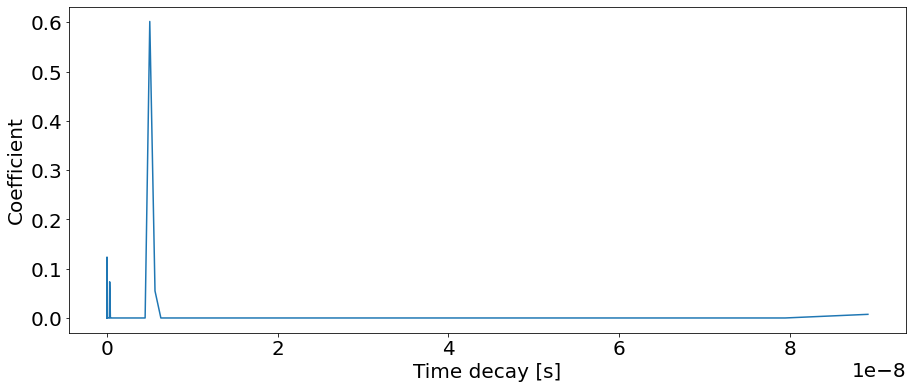

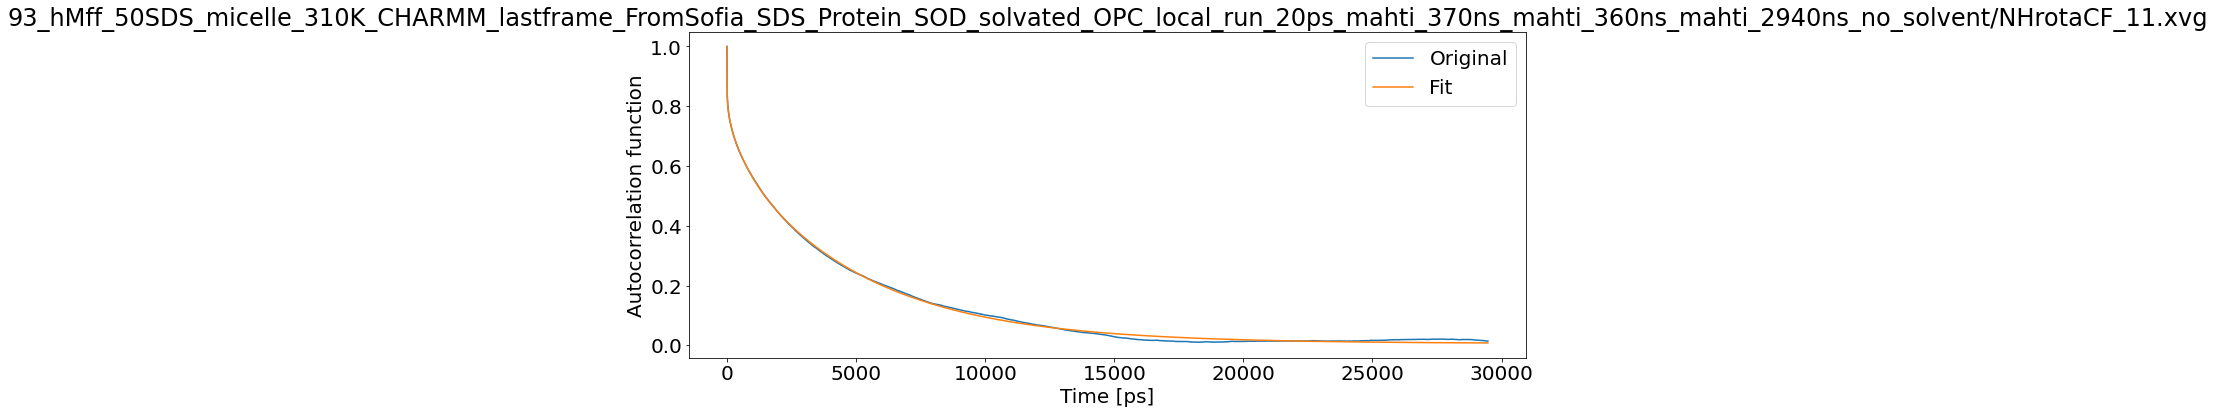

R1: 19.142706141067166 R2: 120.92152079887452 NOE: 0.9741313733995153


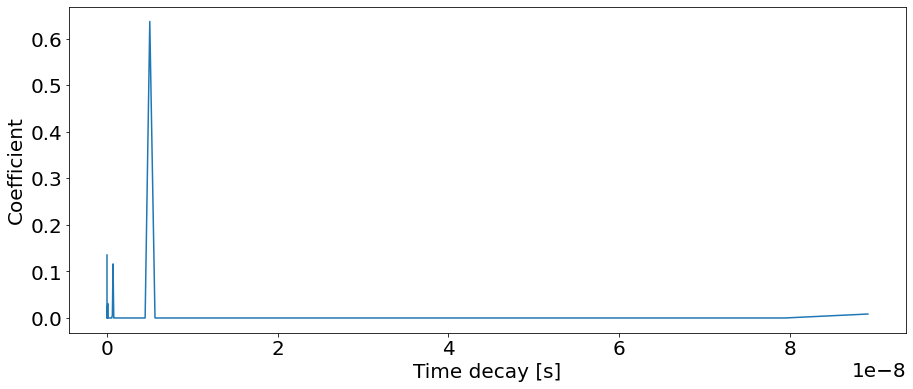

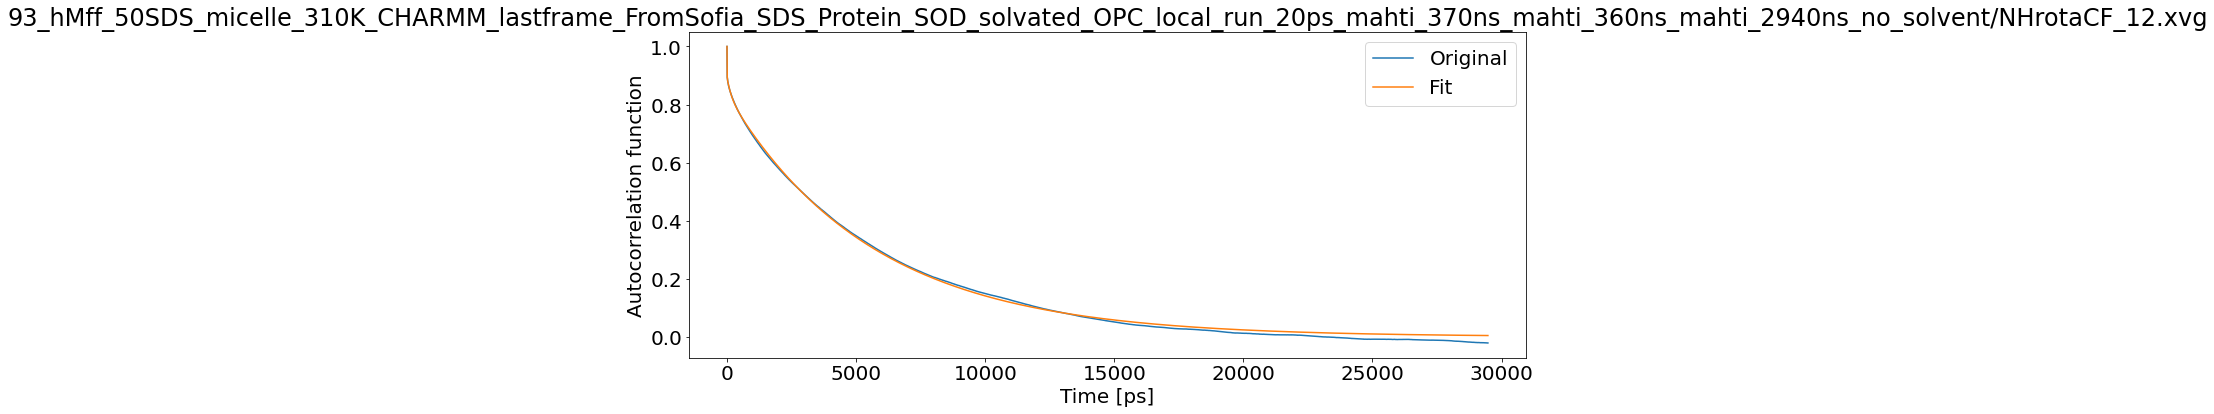

R1: 19.285299707310884 R2: 139.13714018413498 NOE: 0.9812359378164818


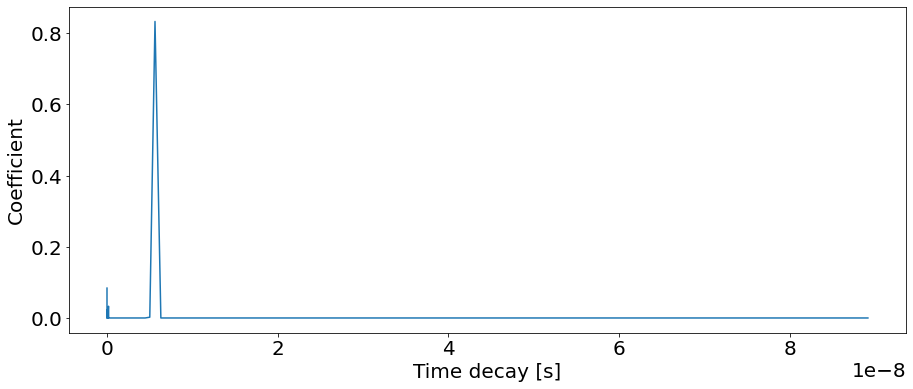

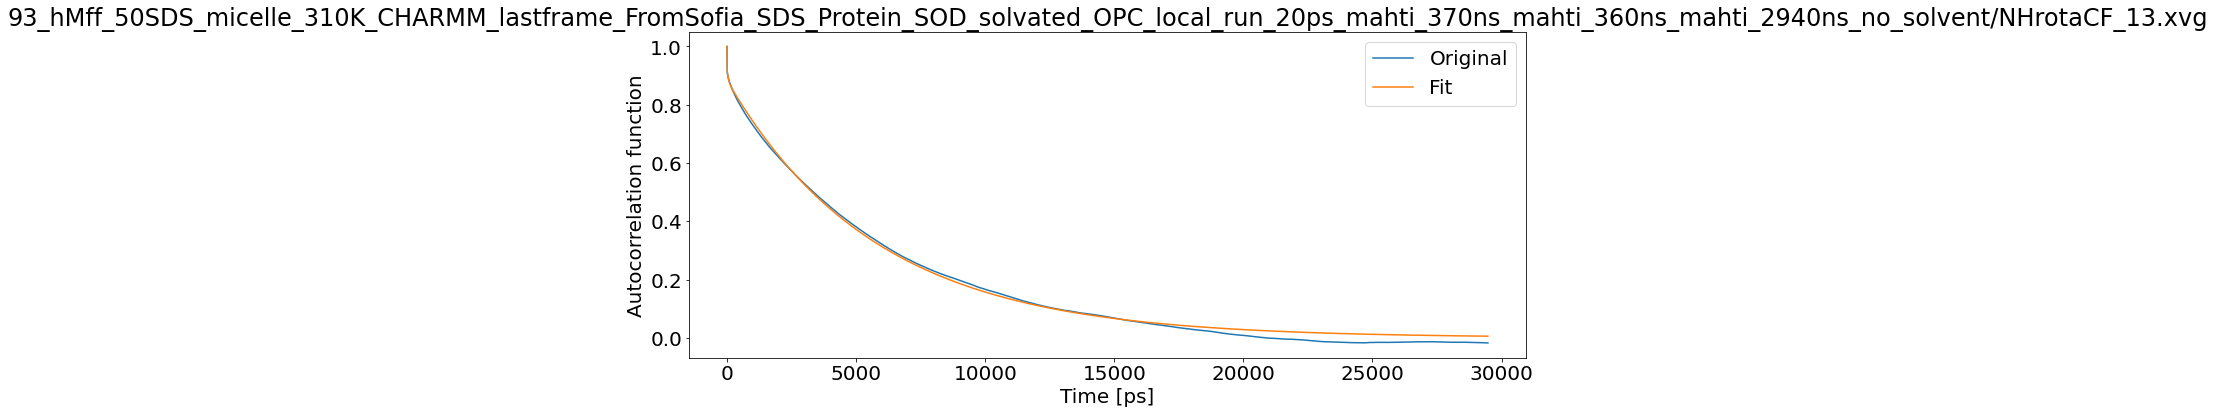

R1: 19.599991369589514 R2: 150.7485590110142 NOE: 0.987298608432611


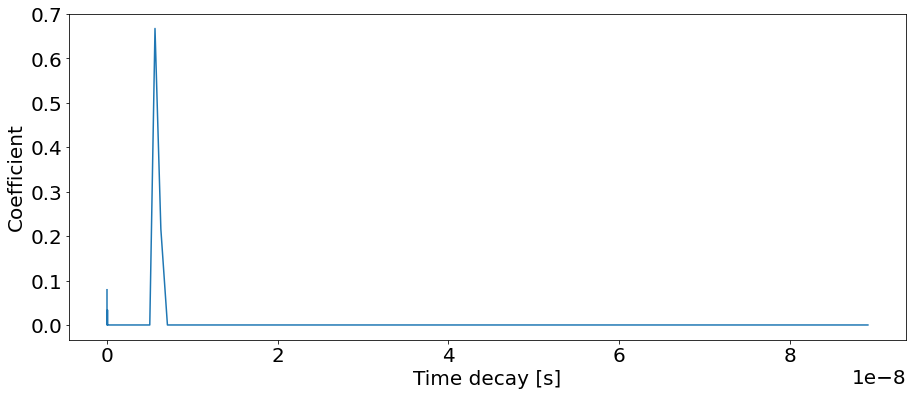

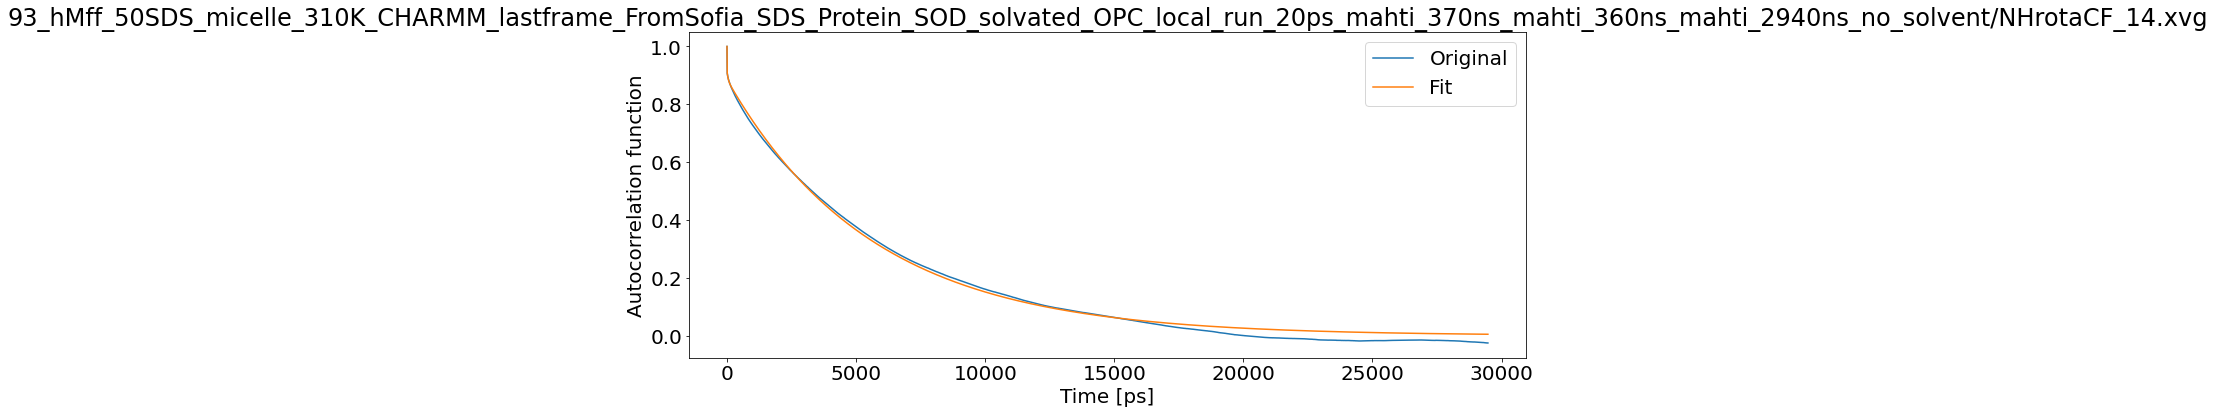

R1: 19.970797290575778 R2: 147.89624983163839 NOE: 0.9882725062474912


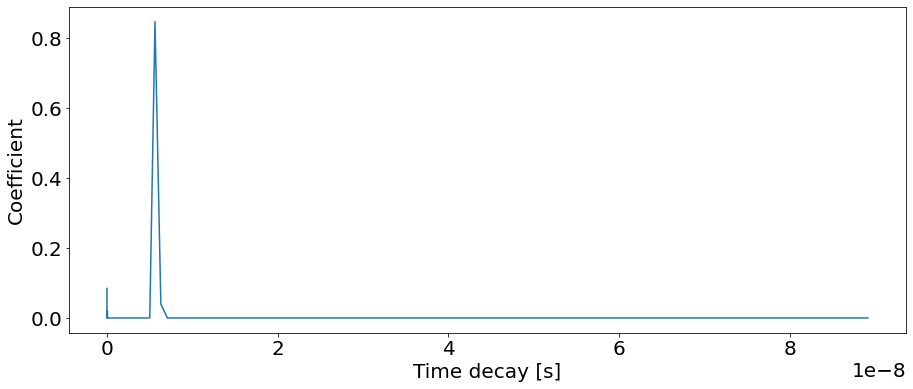

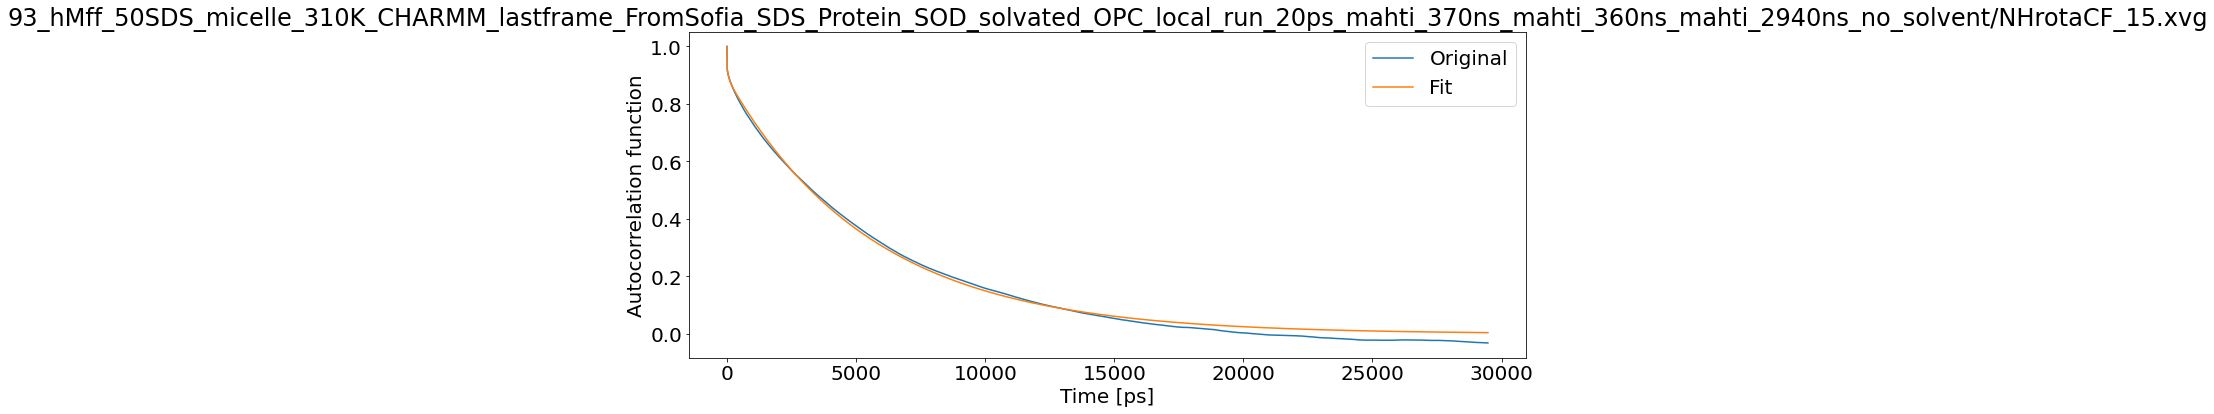

R1: 20.23580450919515 R2: 147.82455802806396 NOE: 0.9868780149959506


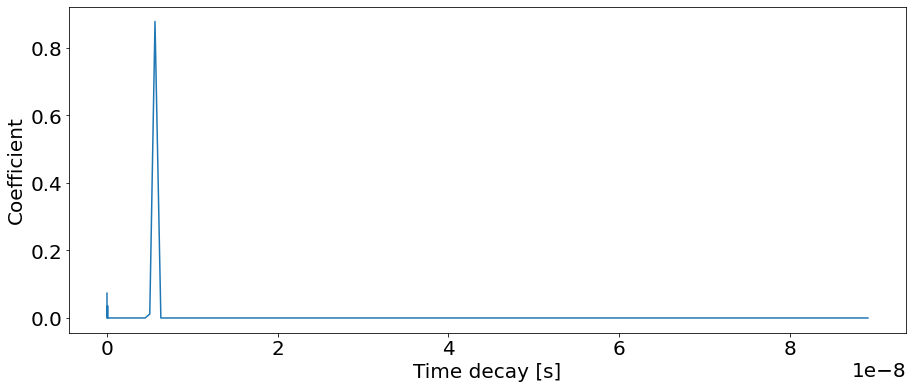

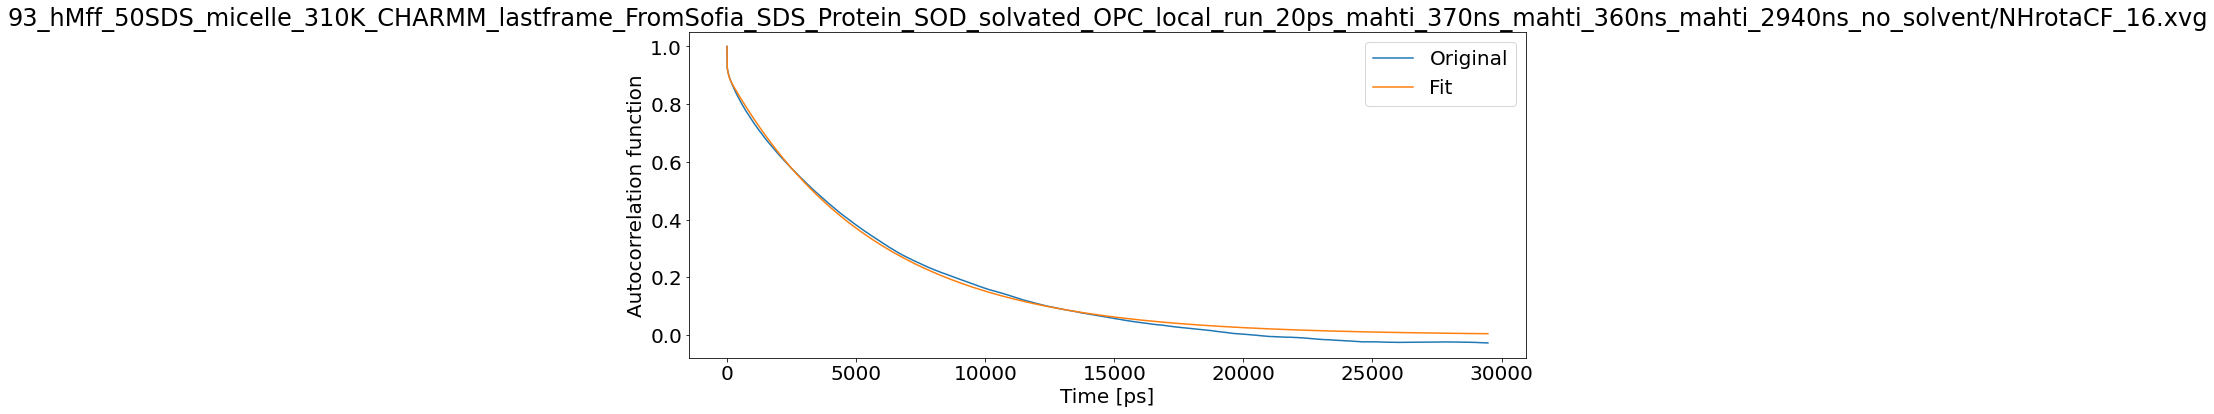

R1: 20.42682336185903 R2: 149.85619556577575 NOE: 0.9879293921623813


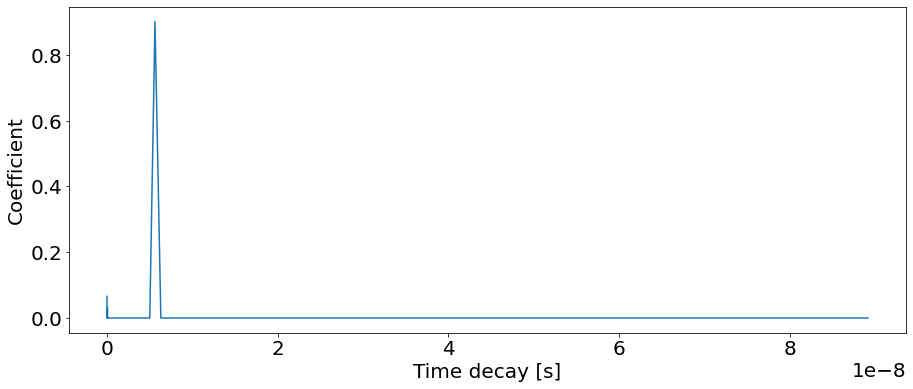

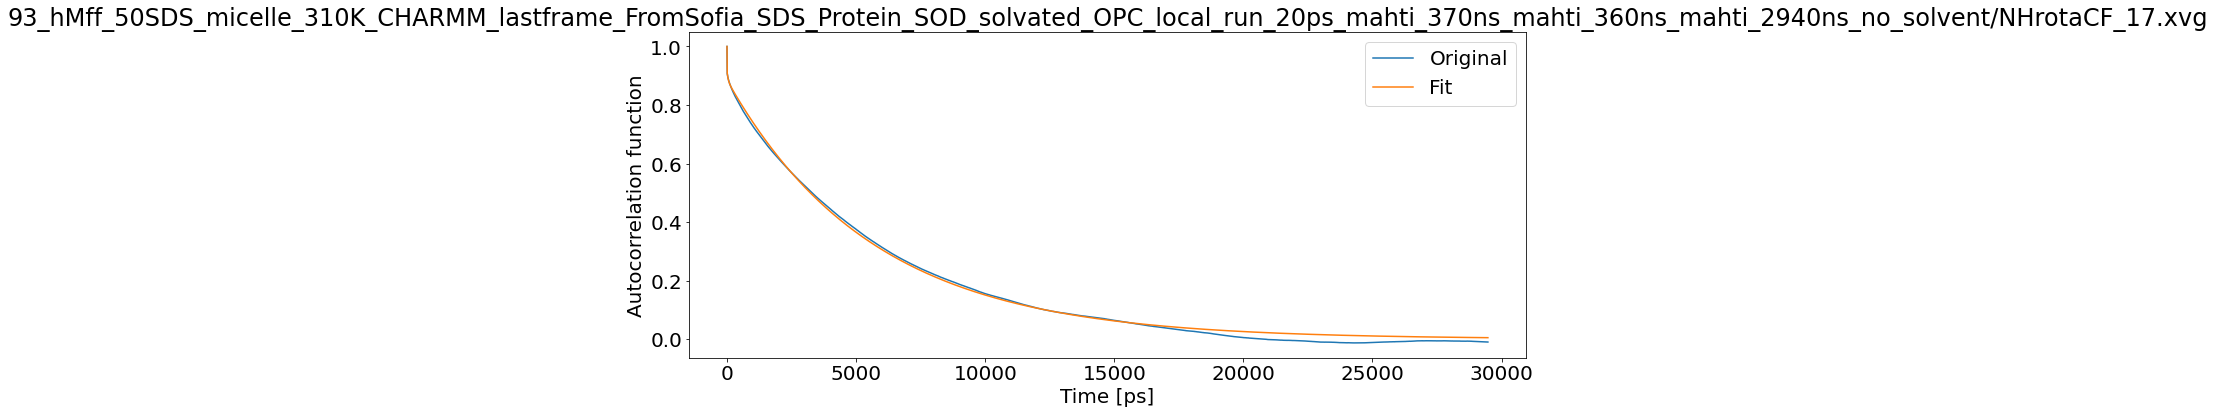

R1: 19.98430877172112 R2: 147.6321962565067 NOE: 0.9881691527992389


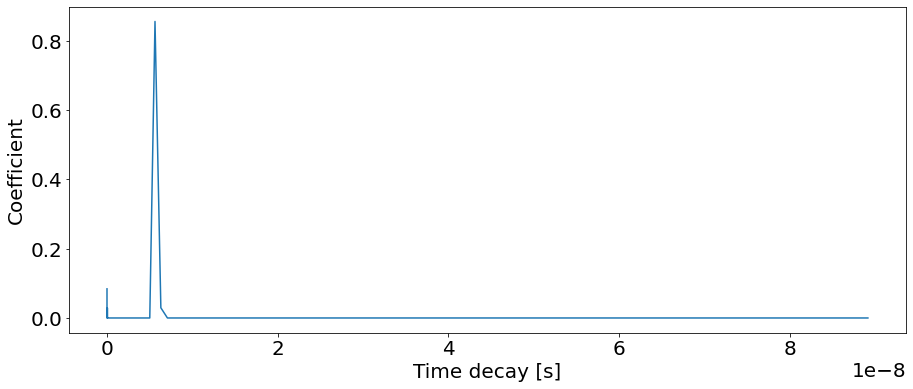

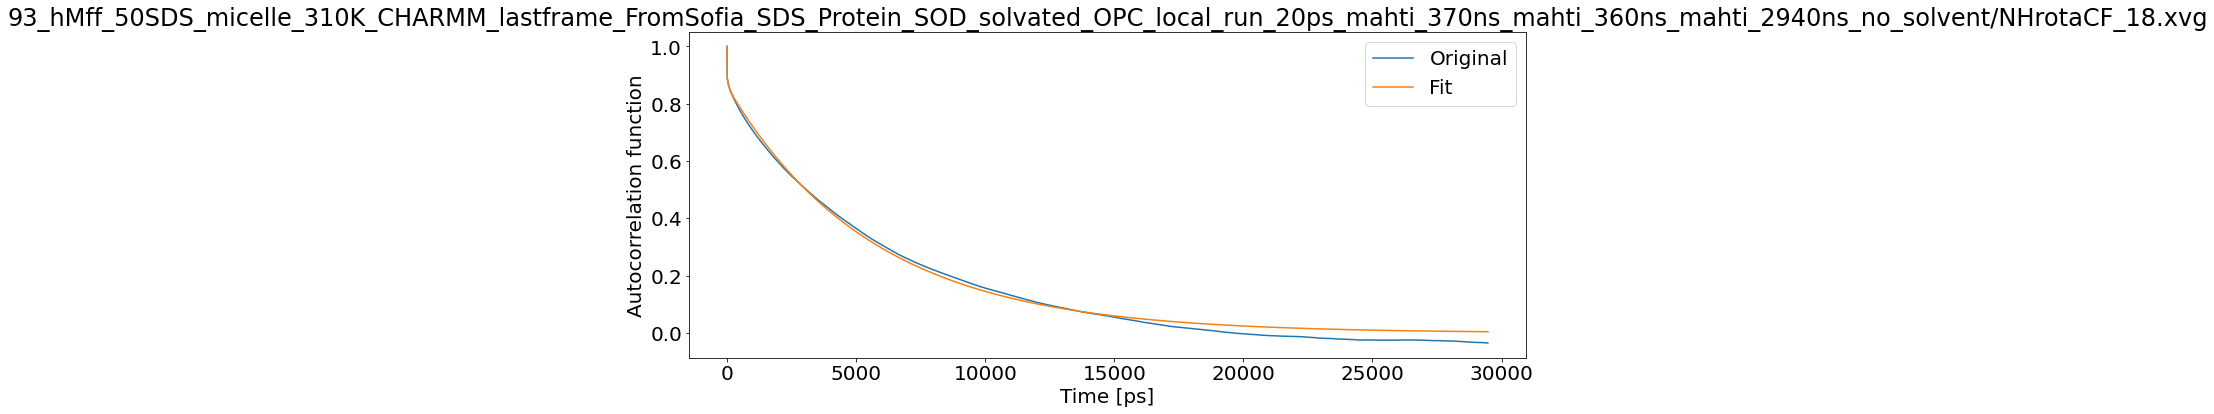

R1: 19.52637209731318 R2: 143.06412239319525 NOE: 0.9871042681293872


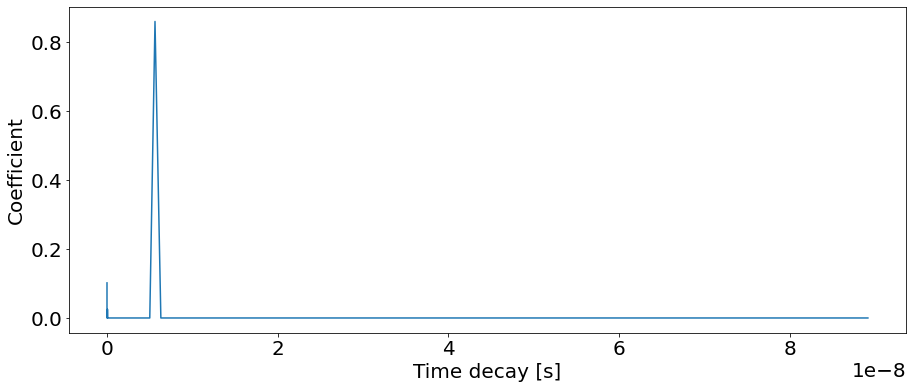

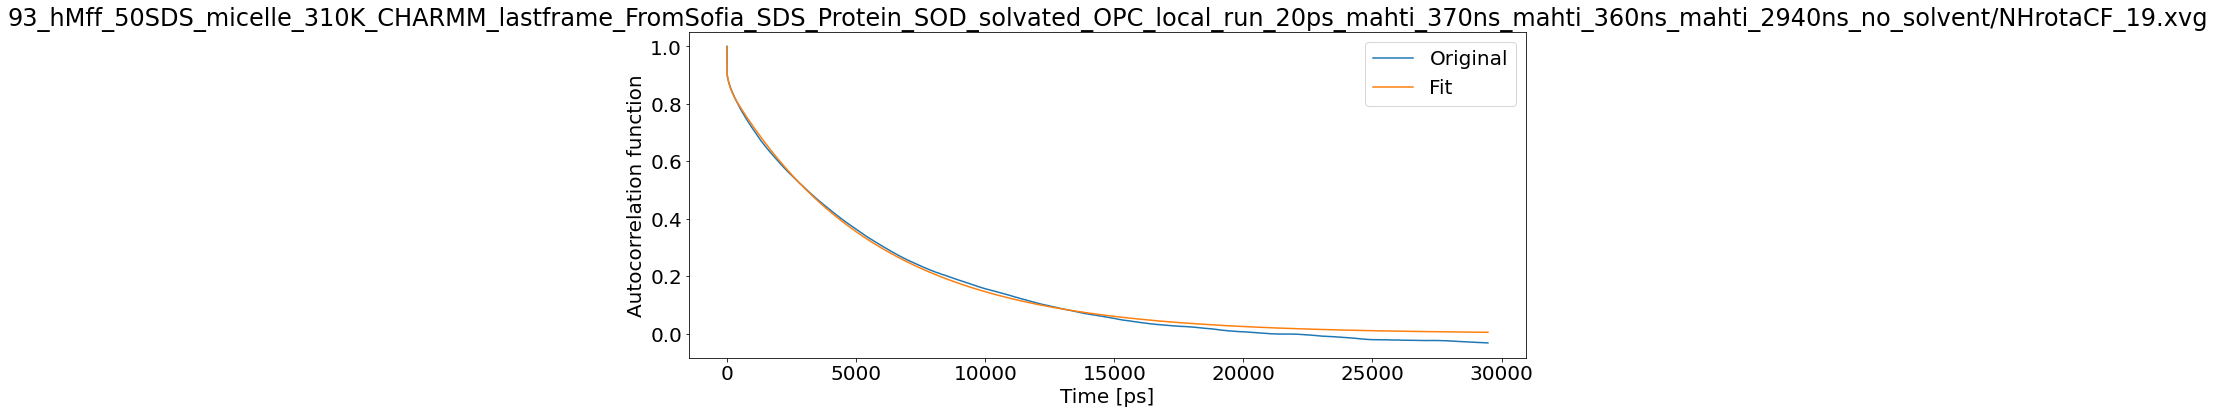

R1: 19.696838916540923 R2: 143.75546594179292 NOE: 0.985200352954931


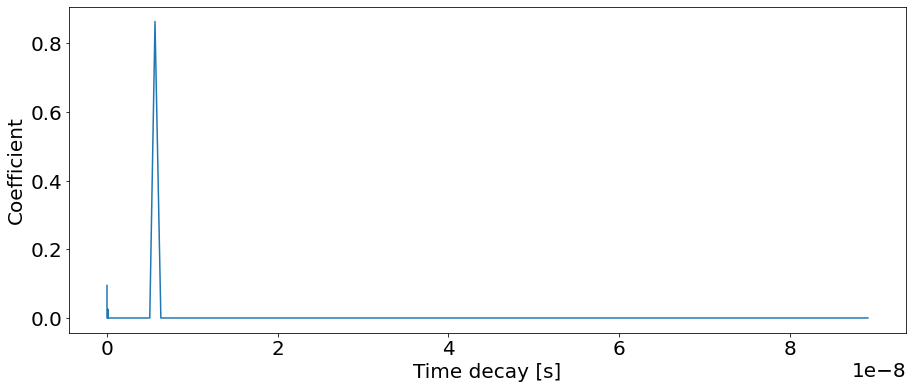

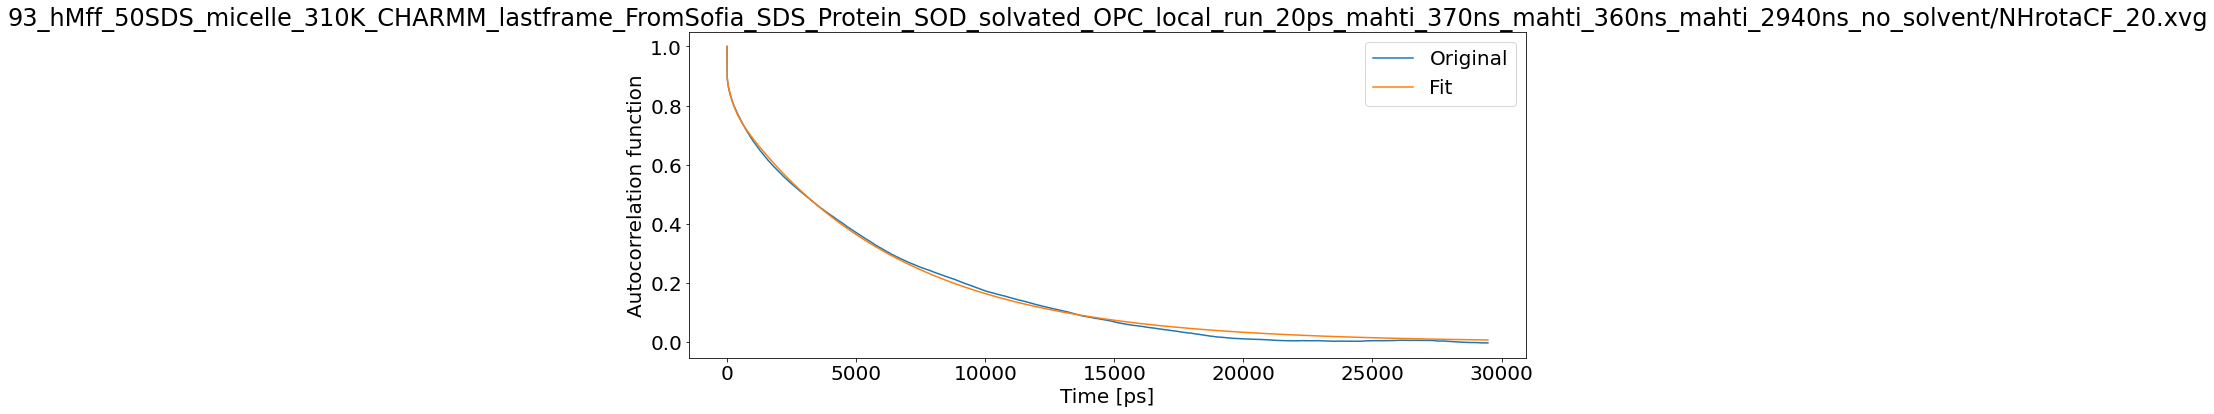

R1: 17.424460688133266 R2: 148.91154685626722 NOE: 0.9762114435009255


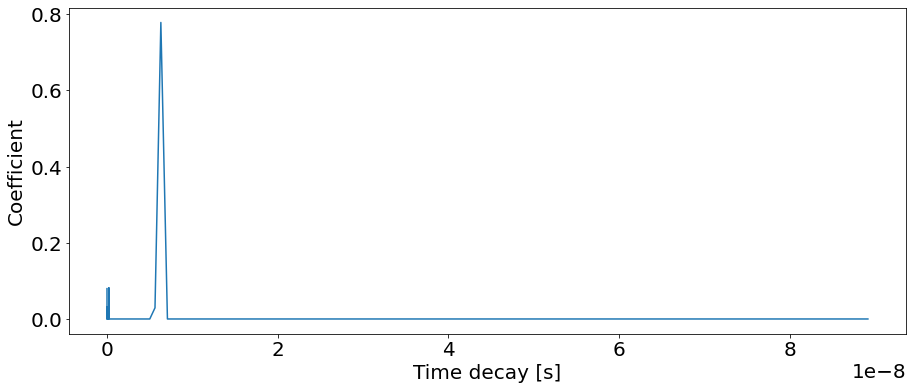

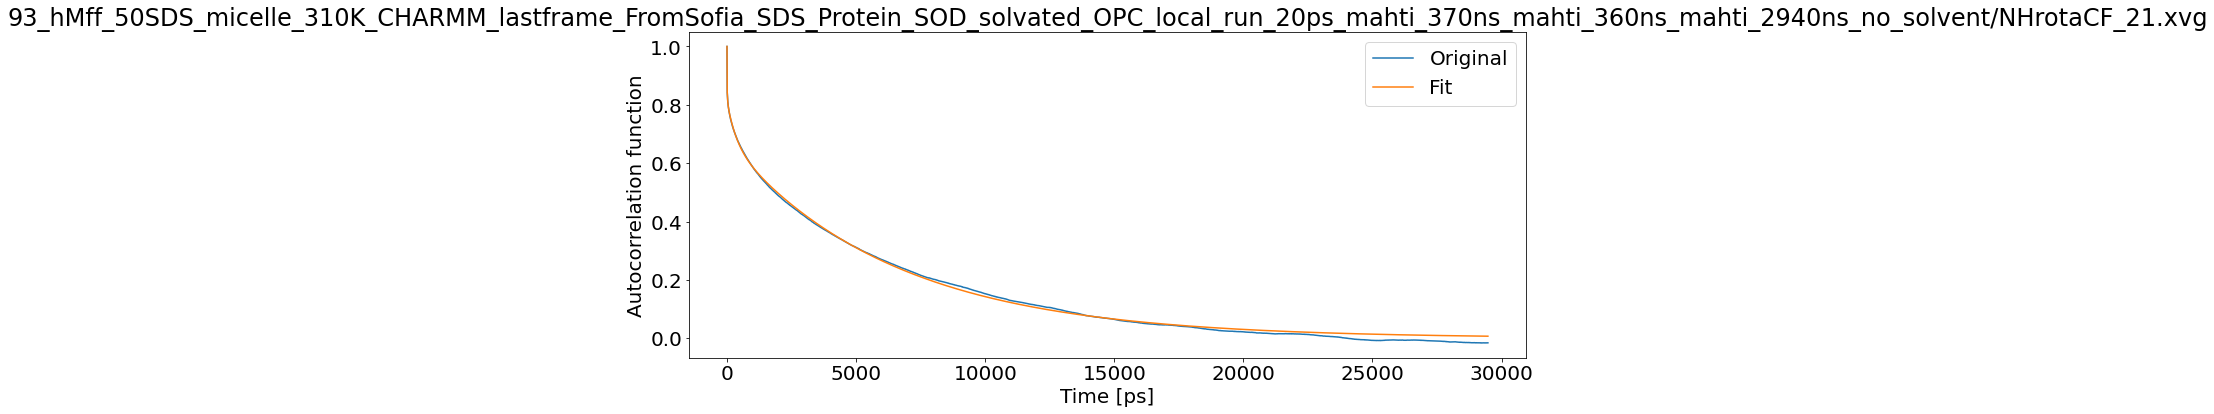

R1: 15.697163215998632 R2: 128.86879818810428 NOE: 0.9666313769431736


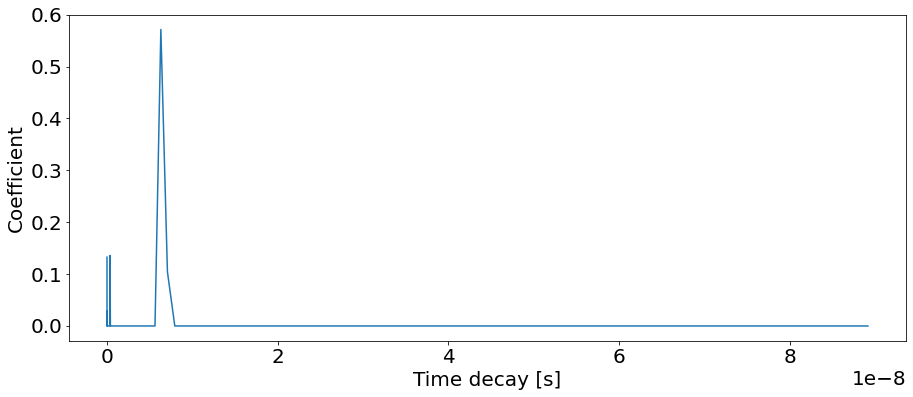

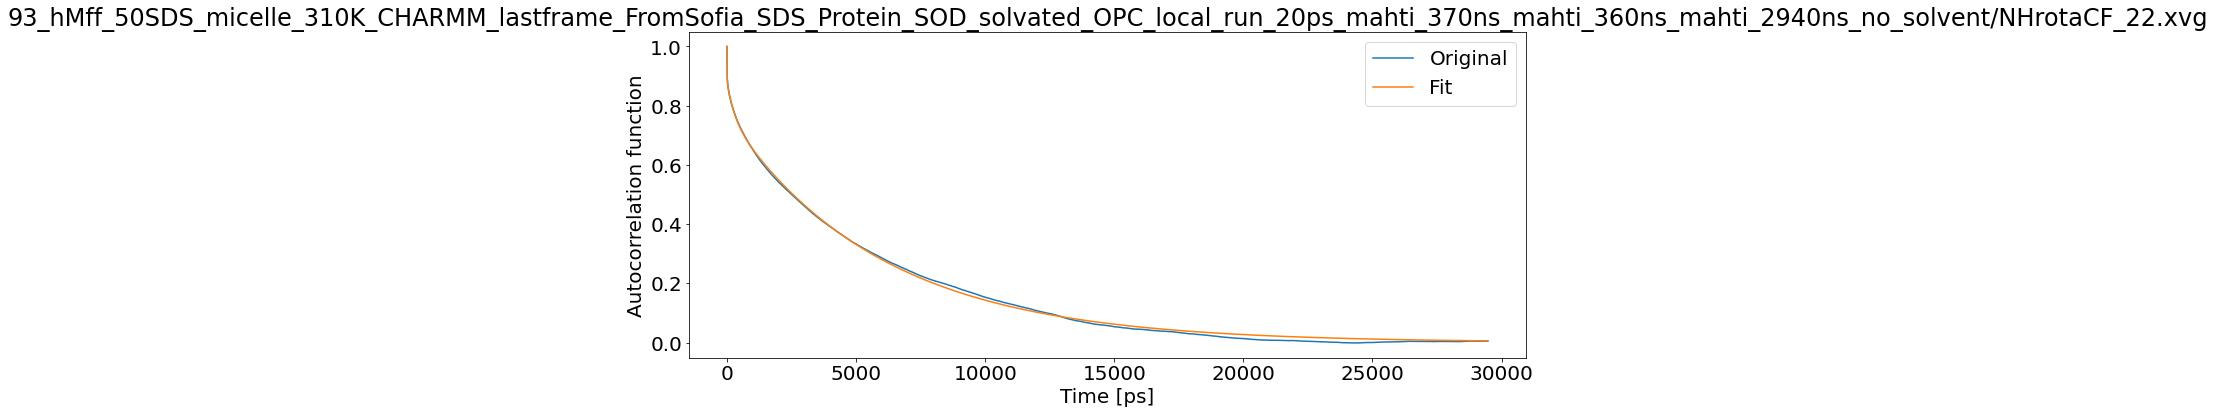

R1: 17.97646251653034 R2: 135.88826597471214 NOE: 0.972500678979708


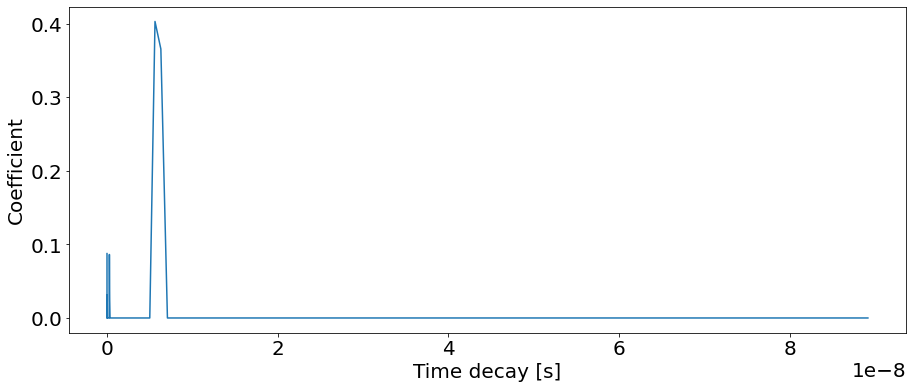

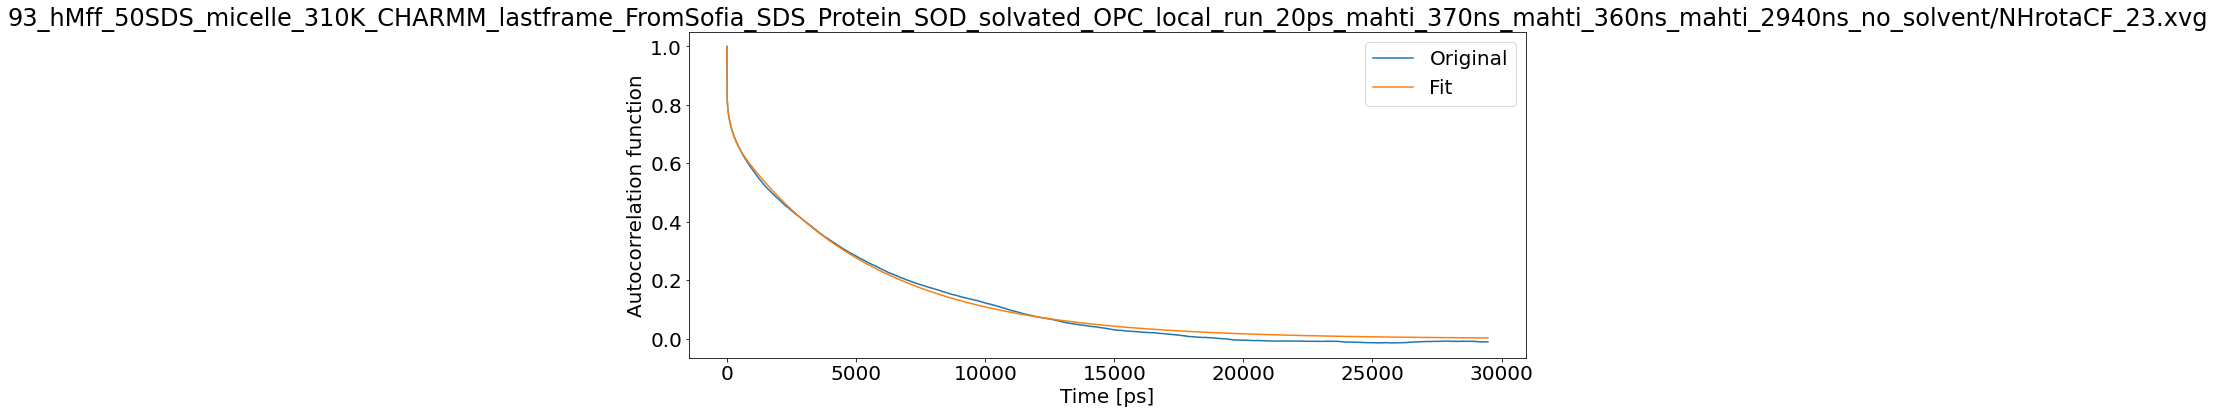

R1: 17.35810931123043 R2: 113.23237817618818 NOE: 0.9729784573859174


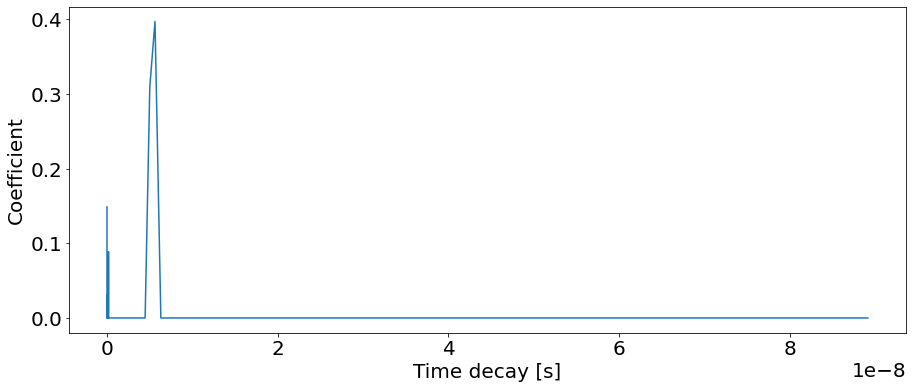

In [20]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

In [32]:
Ctimes_to_save[:,0]

array([1.00000000e-12, 1.12201845e-12, 1.25892541e-12, 1.41253754e-12,
       1.58489319e-12, 1.77827941e-12, 1.99526231e-12, 2.23872114e-12,
       2.51188643e-12, 2.81838293e-12, 3.16227766e-12, 3.54813389e-12,
       3.98107171e-12, 4.46683592e-12, 5.01187234e-12, 5.62341325e-12,
       6.30957344e-12, 7.07945784e-12, 7.94328235e-12, 8.91250938e-12,
       1.00000000e-11, 1.12201845e-11, 1.25892541e-11, 1.41253754e-11,
       1.58489319e-11, 1.77827941e-11, 1.99526231e-11, 2.23872114e-11,
       2.51188643e-11, 2.81838293e-11, 3.16227766e-11, 3.54813389e-11,
       3.98107171e-11, 4.46683592e-11, 5.01187234e-11, 5.62341325e-11,
       6.30957344e-11, 7.07945784e-11, 7.94328235e-11, 8.91250938e-11,
       1.00000000e-10, 1.12201845e-10, 1.25892541e-10, 1.41253754e-10,
       1.58489319e-10, 1.77827941e-10, 1.99526231e-10, 2.23872114e-10,
       2.51188643e-10, 2.81838293e-10, 3.16227766e-10, 3.54813389e-10,
       3.98107171e-10, 4.46683592e-10, 5.01187234e-10, 5.62341325e-10,
      

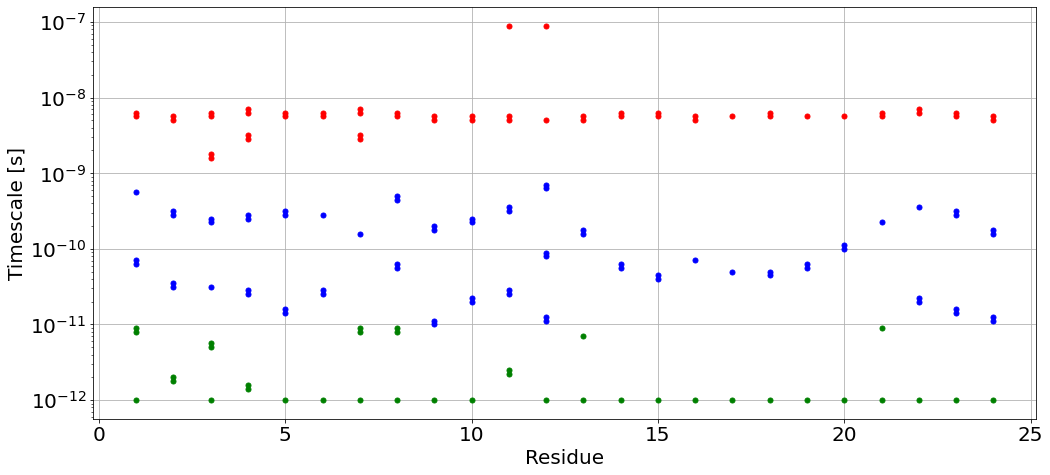

In [45]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.grid()
plt.yscale('log')
plt.ylabel("Timescale [s]")
plt.xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                plt.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
        
plt.show()




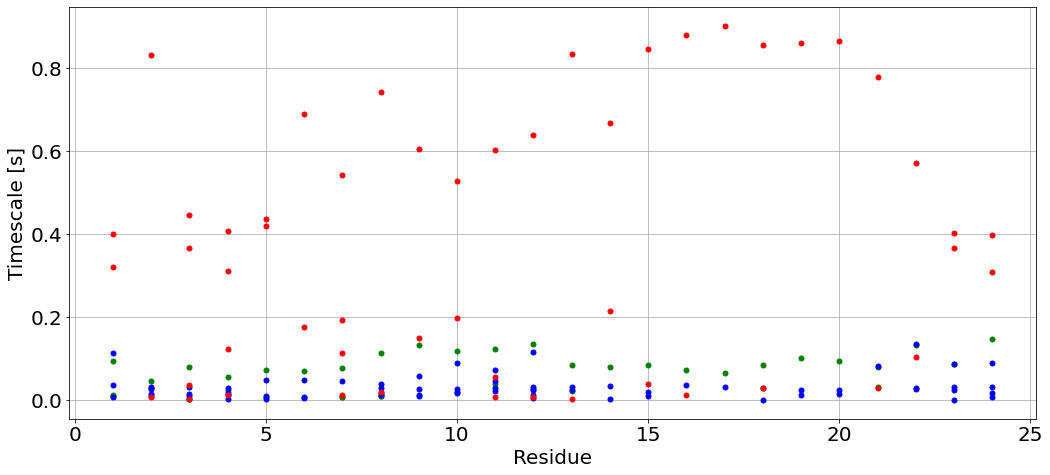

In [47]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.grid()

plt.ylabel("Timescale [s]")
plt.xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                plt.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
        
plt.show()
